In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Conv1D, Flatten, Dense

In [10]:
# dataset = pd.read_csv('data/data-tc.csv')
# X = pd.read_csv('data/data-tc.csv', usecols=['Complexity', 'Time', 'Cost'])
dataset = pd.read_csv('data/kmeans/data-preprocess.csv')
X = pd.read_csv('data/kmeans/data-preprocess.csv', usecols=['Complexity', 'Time', 'Cost'])

In [11]:
X_train = pd.read_csv('data/kmeans/data-train.csv')
X_test = pd.read_csv('data/kmeans/data-test.csv')
y_train = X_train['Class']
y_test = X_test['Class']

In [12]:
X_train.drop(['Class'], axis=1, inplace=True)
X_test.drop(['Class'], axis=1, inplace=True)

In [13]:
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1, activation='softmax'))

In [14]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

accuracy = model.evaluate(X_test, y_test)
print("Accuracy: ", accuracy)

predictions = model.predict(X_test)
y_pred = [1 if x > 0.5 else 0 for x in predictions]

Epoch 1/10


c:\Users\Asus\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


83/83 [==============================] - 2s 7ms/step - loss: 0.0000e+00 - accuracy: 0.3124 - val_loss: 0.0000e+00 - val_accuracy: 0.2704
Epoch 2/10
 1/83 [..............................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.3125

c:\Users\Asus\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


83/83 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.3366 - val_loss: 0.0000e+00 - val_accuracy: 0.3112
Epoch 3/10
83/83 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.3597 - val_loss: 0.0000e+00 - val_accuracy: 0.2946
Epoch 4/10
83/83 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.3786 - val_loss: 0.0000e+00 - val_accuracy: 0.3807
Epoch 5/10
83/83 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.4145 - val_loss: 0.0000e+00 - val_accuracy: 0.3822
Epoch 6/10
83/83 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.4168 - val_loss: 0.0000e+00 - val_accuracy: 0.3822
Epoch 7/10
83/83 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.4274 - val_loss: 0.0000e+00 - val_accuracy: 0.3761
Epoch 8/10
83/83 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.4198 - val_loss: 0.0000e+0

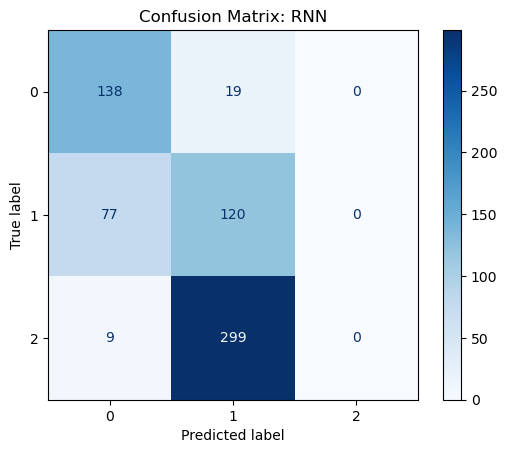

In [15]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix: RNN")
plt.show()

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.88      0.72       157
           1       0.27      0.61      0.38       197
           2       0.00      0.00      0.00       308

    accuracy                           0.39       662
   macro avg       0.30      0.50      0.37       662
weighted avg       0.23      0.39      0.28       662



c:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
